In [85]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report

In [2]:
dataset = pd.read_csv('./dataset/sonar_data.csv', header = None)


In [3]:
print (dataset.shape)

(208, 61)


In [4]:
pd.options.display.max_rows = 500
print (dataset.dtypes)

0     float64
1     float64
2     float64
3     float64
4     float64
5     float64
6     float64
7     float64
8     float64
9     float64
10    float64
11    float64
12    float64
13    float64
14    float64
15    float64
16    float64
17    float64
18    float64
19    float64
20    float64
21    float64
22    float64
23    float64
24    float64
25    float64
26    float64
27    float64
28    float64
29    float64
30    float64
31    float64
32    float64
33    float64
34    float64
35    float64
36    float64
37    float64
38    float64
39    float64
40    float64
41    float64
42    float64
43    float64
44    float64
45    float64
46    float64
47    float64
48    float64
49    float64
50    float64
51    float64
52    float64
53    float64
54    float64
55    float64
56    float64
57    float64
58    float64
59    float64
60     object
dtype: object


In [5]:
pd.options.display.max_columns = 65
dataset.head(20)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,0.1609,0.1582,0.2238,0.0645,0.0660,0.2273,0.3100,0.2999,0.5078,0.4797,0.5783,0.5071,0.4328,0.5550,0.6711,0.6415,0.7104,0.8080,0.6791,0.3857,0.1307,0.2604,0.5121,0.7547,0.8537,0.8507,0.6692,0.6097,0.4943,0.2744,0.0510,0.2834,0.2825,0.4256,0.2641,0.1386,0.1051,0.1343,0.0383,0.0324,0.0232,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,0.4918,0.6552,0.6919,0.7797,0.7464,0.9444,1.0000,0.8874,0.8024,0.7818,0.5212,0.4052,0.3957,0.3914,0.3250,0.3200,0.3271,0.2767,0.4423,0.2028,0.3788,0.2947,0.1984,0.2341,0.1306,0.4182,0.3835,0.1057,0.1840,0.1970,0.1674,0.0583,0.1401,0.1628,0.0621,0.0203,0.0530,0.0742,0.0409,0.0061,0.0125,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,0.6333,0.7060,0.5544,0.5320,0.6479,0.6931,0.6759,0.7551,0.8929,0.8619,0.7974,0.6737,0.4293,0.3648,0.5331,0.2413,0.5070,0.8533,0.6036,0.8514,0.8512,0.5045,0.1862,0.2709,0.4232,0.3043,0.6116,0.6756,0.5375,0.4719,0.4647,0.2587,0.2129,0.2222,0.2111,0.0176,0.1348,0.0744,0.0130,0.0106,0.0033,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,0.0881,0.1992,0.0184,0.2261,0.1729,0.2131,0.0693,0.2281,0.4060,0.3973,0.2741,0.3690,0.5556,0.4846,0.3140,0.5334,0.5256,0.2520,0.2090,0.3559,0.6260,0.7340,0.6120,0.3497,0.3953,0.3012,0.5408,0.8814,0.9857,0.9167,0.6121,0.5006,0.3210,0.3202,0.4295,0.3654,0.2655,0.1576,0.0681,0.0294,0.0241,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,0.4152,0.3952,0.4256,0.4135,0.4528,0.5326,0.7306,0.6193,0.2032,0.4636,0.4148,0.4292,0.5730,0.5399,0.3161,0.2285,0.6995,1.0000,0.7262,0.4724,0.5103,0.5459,0.2881,0.0981,0.1951,0.4181,0.4604,0.3217,0.2828,0.2430,0.1979,0.2444,0.1847,0.0841,0.0692,0.0528,0.0357,0.0085,0.0230,0.0046,0.0156,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R
5,0.0286,0.0453,0.0277,0.0174,0.0384,0.0990,0.1201,0.1833,0.2105,0.3039,0.2988,0.4250,0.6343,0.8198,1.0000,0.9988,0.9508,0.9025,0.7234,0.5122,0.2074,0.3985,0.5890,0.2872,0.2043,0.5782,0.5389,0.3750,0.3411,0.5067,0.5580,0.4778,0.3299,0.2198,0.1407,0.2856,0.3807,0.4158,0.4054,0.3296,0.2707,0.2650,0.0723,0.1238,0.1192,0.1089,0.0623,0.0494,0.0264,0.0081,0.0104,0.0045,0.0014,0.0038,0.0013,0.0089,0.0057,0.0027,0.0051,0.0062,R
6,0.0317,0.0956,0.1321,0.1408,0.1674,0.1710,0.0731,0.1401,0.2083,0.3513,0.1786,0.0658,0.0513,0.3752,0.5419,0.5440,0.5150,0.4262,0.2024,0.4233,0.7723,0.9735,0.9390,0.5559,0.5268,0.6826,0.5713,0.5429,0.2177,0.2149,0.5811,0.6323,0.2965,0.1873,0.2969,0.5163,0.6153,0.4283,0.5479,0.6133,0.5017,0.2377,0.1957,0.1749,0.1304,0.0597,0.1124,0.1047,0.0507,0.0159,0.0195,0.0201,0.0248,0.0131,0.0070,0.0138,0.0092,0.0143,0.0036,0.0103,R
7,0.0519,0.0548,0.0842,0.0319,0.1158,0.0922,0.1027,0.0613,0.1465,0.2838,0.2802,0.3086,0.2657,0.3801,0.5626,0.4376,0.2617,0.1199,0.6676,0.9402,0.7832,0.5352,0.6809,0.9174,0.7613,0.8220,0.8872,0.6091,0.2967,0.1103,0.1318,0.0624,0.0990,0.4006,0.3666,0.1050,0.1915,0.3930,0.4288,0.2546,0.1151,0.2196,0.1879,0.1437,0.2146,0.2360,0.1125,0.0254,0.0285,0.0178,0.0052,0.0081,0.0120,0.0045,0.0121,0.0097,0.0085,0.0047,0.0048,0.0053,R
8,0.0223,0.0375,0.0484,0.0475,0.0647,0.0591,0.0753,0.0098,0.0684,0.1487,0.1156,0.1654,0.3833,0.3598,0.1713,0.1136,0.0349,0.3796,0.7401,0.9925,0.9802,0.8890,0.6712,0.4286,0.3374,0.7366,0.9611,0.7353,0.4856,0.1594,0.3007,0.4096,0.3170,0.3305,0.3408,0.2186,0.2463,0.2726,0.1680,0.2792,0.2558,0.1740,0.2121,0.1099,0.0985,0.1271,0.1459,0.1164,0.0777,0.0439,0.0061,0.0145,0.0128,0.0145,0.0058,0.0049,0.0065,0.0093,0.0059,0.0022,R
9,0.0164,0

In [6]:
dataset.tail(20)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60
188,0.0089,0.0274,0.0248,0.0237,0.0224,0.0845,0.1488,0.1224,0.1569,0.2119,0.3003,0.3094,0.2743,0.2547,0.1870,0.1452,0.1457,0.2429,0.3259,0.3679,0.3355,0.3100,0.3914,0.5280,0.6409,0.7707,0.8754,1.0000,0.9806,0.6969,0.4973,0.5020,0.5359,0.3842,0.1848,0.1149,0.1570,0.1311,0.1583,0.2631,0.3103,0.4512,0.3785,0.1269,0.1459,0.1092,0.1485,0.1385,0.0716,0.0176,0.0199,0.0096,0.0103,0.0093,0.0025,0.0044,0.0021,0.0069,0.0060,0.0018,M
189,0.0158,0.0239,0.0150,0.0494,0.0988,0.1425,0.1463,0.1219,0.1697,0.1923,0.2361,0.2719,0.3049,0.2986,0.2226,0.1745,0.2459,0.3100,0.3572,0.4283,0.4268,0.3735,0.4585,0.6094,0.7221,0.7595,0.8706,1.0000,0.9815,0.7187,0.5848,0.4192,0.3756,0.3263,0.1944,0.1394,0.1670,0.1275,0.1666,0.2574,0.2258,0.2777,0.1613,0.1335,0.1976,0.1234,0.1554,0.1057,0.0490,0.0097,0.0223,0.0121,0.0108,0.0057,0.0028,0.0079,0.0034,0.0046,0.0022,0.0021,M
190,0.0156,0.0210,0.0282,0.0596,0.0462,0.0779,0.1365,0.0780,0.1038,0.1567,0.2476,0.2783,0.2896,0.2956,0.3189,0.1892,0.1730,0.2226,0.2427,0.3149,0.4102,0.3808,0.4896,0.6292,0.7519,0.7985,0.8830,0.9915,0.9223,0.6981,0.6167,0.5069,0.3921,0.3524,0.2183,0.1245,0.1592,0.1626,0.2356,0.2483,0.2437,0.2715,0.1184,0.1157,0.1449,0.1883,0.1954,0.1492,0.0511,0.0155,0.0189,0.0150,0.0060,0.0082,0.0091,0.0038,0.0056,0.0056,0.0048,0.0024,M
191,0.0315,0.0252,0.0167,0.0479,0.0902,0.1057,0.1024,0.1209,0.1241,0.1533,0.2128,0.2536,0.2686,0.2803,0.1886,0.1485,0.2160,0.2417,0.2989,0.3341,0.3786,0.3956,0.5232,0.6913,0.7868,0.8337,0.9199,1.0000,0.8990,0.6456,0.5967,0.4355,0.2997,0.2294,0.1866,0.0922,0.1829,0.1743,0.2452,0.2407,0.2518,0.3184,0.1685,0.0675,0.1186,0.1833,0.1878,0.1114,0.0310,0.0143,0.0138,0.0108,0.0062,0.0044,0.0072,0.0007,0.0054,0.0035,0.0001,0.0055,M
192,0.0056,0.0267,0.0221,0.0561,0.0936,0.1146,0.0706,0.0996,0.1673,0.1859,0.2481,0.2712,0.2934,0.2637,0.1880,0.1405,0.2028,0.2613,0.2778,0.3346,0.3830,0.4003,0.5114,0.6860,0.7490,0.7843,0.9021,1.0000,0.8888,0.6511,0.6083,0.4463,0.2948,0.1729,0.1488,0.0801,0.1770,0.1382,0.2404,0.2046,0.1970,0.2778,0.1377,0.0685,0.0664,0.1665,0.1807,0.1245,0.0516,0.0044,0.0185,0.0072,0.0055,0.0074,0.0068,0.0084,0.0037,0.0024,0.0034,0.0007,M
193,0.0203,0.0121,0.0380,0.0128,0.0537,0.0874,0.1021,0.0852,0.1136,0.1747,0.2198,0.2721,0.2105,0.1727,0.2040,0.1786,0.1318,0.2260,0.2358,0.3107,0.3906,0.3631,0.4809,0.6531,0.7812,0.8395,0.9180,0.9769,0.8937,0.7022,0.6500,0.5069,0.3903,0.3009,0.1565,0.0985,0.2200,0.2243,0.2736,0.2152,0.2438,0.3154,0.2112,0.0991,0.0594,0.1940,0.1937,0.1082,0.0336,0.0177,0.0209,0.0134,0.0094,0.0047,0.0045,0.0042,0.0028,0.0036,0.0013,0.0016,M
194,0.0392,0.0108,0.0267,0.0257,0.0410,0.0491,0.1053,0.1690,0.2105,0.2471,0.2680,0.3049,0.2863,0.2294,0.1165,0.2127,0.2062,0.2222,0.3241,0.4330,0.5071,0.5944,0.7078,0.7641,0.8878,0.9711,0.9880,0.9812,0.9464,0.8542,0.6457,0.3397,0.3828,0.3204,0.1331,0.0440,0.1234,0.2030,0.1652,0.1043,0.1066,0.2110,0.2417,0.1631,0.0769,0.0723,0.0912,0.0812,0.0496,0.0101,0.0089,0.0083,0.0080,0.0026,0.0079,0.0042,0.0071,0.0044,0.0022,0.0014,M
195,0.0129,0.0141,0.0309,0.0375,0.0767,0.0787,0.0662,0.1108,0.1777,0.2245,0.2431,0.3134,0.3206,0.2917,0.2249,0.2347,0.2143,0.2939,0.4898,0.6127,0.7531,0.7718,0.7432,0.8673,0.9308,0.9836,1.0000,0.9595,0.8722,0.6862,0.4901,0.3280,0.3115,0.1969,0.1019,0.0317,0.0756,0.0907,0.1066,0.1380,0.0665,0.1475,0.2470,0.2788,0.2709,0.2283,0.1818,0.1185,0.0546,0.0219,0.0204,0.0124,0.0093,0.0072,0.0019,0.0027,0.0054,0.0017,0.0024,0.0029,M
196,0.0050,0.0017,0.0270,0.0450,0.0958,0.0830,0.0879,0.1220,0.1977,0.2282,0.2521,0.3484,0.3309,0.2614,0.1782,0.2055,0.2298,0.3545,0.6218,0.7265,0.8346,0.8268,0.8366,0.9408,0.9510,0.9801,0.9974,1.0000,0.9036,0.6409,0.3857,0.2908,0.2040,0.1653,0.1769,0.1140,0.0740,0.0941,0.0621,0.0426,0.0572,0.1068,0.1909,0.2229,0.2203,0.2265,0.1766,0.1097,0.0558,0.0142,0.0281,0.0165,0.0056,0.0010,0.0027,0.0062,0.0024,0.0063,0.0017,0

In [7]:
print (dataset.groupby(60).size())

60
M    111
R     97
dtype: int64


In [8]:
dataset.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59
count,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000
mean,0.029164,0.038437,0.043832,0.053892,0.075202,0.104570,0.121747,0.134799,0.178003,0.208259,0.236013,0.250221,0.273305,0.296568,0.320201,0.378487,0.415983,0.452318,0.504812,0.563047,0.609060,0.624275,0.646975,0.672654,0.675424,0.699866,0.702155,0.694024,0.642074,0.580928,0.504475,0.439040,0.417220,0.403233,0.392571,0.384848,0.363807,0.339657,0.325800,0.311207,0.289252,0.278293,0.246542,0.214075,0.197232,0.160631,0.122453,0.091424,0.051929,0.020424,0.016069,0.013420,0.010709,0.010941,0.009290,0.008222,0.007820,0.007949,0.007941,0.006507
std,0.022991,0.032960,0.038428,0.046528,0.055552,0.059105,0.061788,0.085152,0.118387,0.134416,0.132705,0.140072,0.140962,0.164474,0.205427,0.232650,0.263677,0.261529,0.257988,0.262653,0.257818,0.255883,0.250175,0.239116,0.244926,0.237228,0.245657,0.237189,0.240250,0.220749,0.213992,0.213237,0.206513,0.231242,0.259132,0.264121,0.239912,0.212973,0.199075,0.178662,0.171111,0.168728,0.138993,0.133291,0.151628,0.133938,0.086953,0.062417,0.035954,0.013665,0.012008,0.009634,0.007060,0.007301,0.007088,0.005736,0.005785,0.006470,0.006181,0.005031
min,0.001500,0.000600,0.001500,0.005800,0.006700,0.010200,0.003300,0.005500,0.007500,0.011300,0.028900,0.023600,0.018400,0.027300,0.003100,0.016200,0.034900,0.037500,0.049400,0.065600,0.051200,0.021900,0.056300,0.023900,0.024000,0.092100,0.048100,0.028400,0.014400,0.061300,0.048200,0.040400,0.047700,0.021200,0.022300,0.008000,0.035100,0.038300,0.037100,0.011700,0.036000,0.005600,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000800,0.000500,0.001000,0.000600,0.000400,0.000300,0.000300,0.000100,0.000600
25%,0.013350,0.016450,0.018950,0.024375,0.038050,0.067025,0.080900,0.080425,0.097025,0.111275,0.129250,0.133475,0.166125,0.175175,0.164625,0.196300,0.205850,0.242075,0.299075,0.350625,0.399725,0.406925,0.450225,0.540725,0.525800,0.544175,0.531900,0.534775,0.463700,0.411400,0.345550,0.281400,0.257875,0.217575,0.179375,0.154350,0.160100,0.174275,0.173975,0.186450,0.163100,0.158900,0.155200,0.126875,0.094475,0.068550,0.064250,0.045125,0.026350,0.011550,0.008425,0.007275,0.005075,0.005375,0.004150,0.004400,0.003700,0.003600,0.003675,0.003100
50%,0.022800,0.030800,0.034300,0.044050,0.062500,0.092150,0.106950,0.112100,0.152250,0.182400,0.224800,0.249050,0.263950,0.281100,0.281700,0.304700,0.308400,0.368300,0.434950,0.542500,0.617700,0.664900,0.699700,0.698500,0.721100,0.754500,0.745600,0.731900,0.680800,0.607150,0.490350,0.429600,0.391200,0.351050,0.312750,0.321150,0.306300,0.312700,0.283500,0.278050,0.259500,0.245100,0.222550,0.177700,0.148000,0.121350,0.101650,0.078100,0.044700,0.017900,0.013900,0.011400,0.009550,0.009300,0.007500,0.006850,0.005950,0.005800,0.006400,0.005300
75%,0.035550,0.047950,0.057950,0.064500,0.100275,0.134125,0.154000,0.169600,0.233425,0.268700,0.301650,0.331250,0.351250,0.386175,0.452925,0.535725,0.659425,0.679050,0.731400,0.809325,0.816975,0.831975,0.848575,0.872175,0.873725,0.893800,0.917100,0.900275,0.852125,0.735175,0.641950,0.580300,0.556125,0.596125,0.593350,0.556525,0.518900,0.440550,0.434900,0.424350,0.387525,0.384250,0.324525,0.271750,0.231550,0.200375,0.154425,0.120100,0.0685

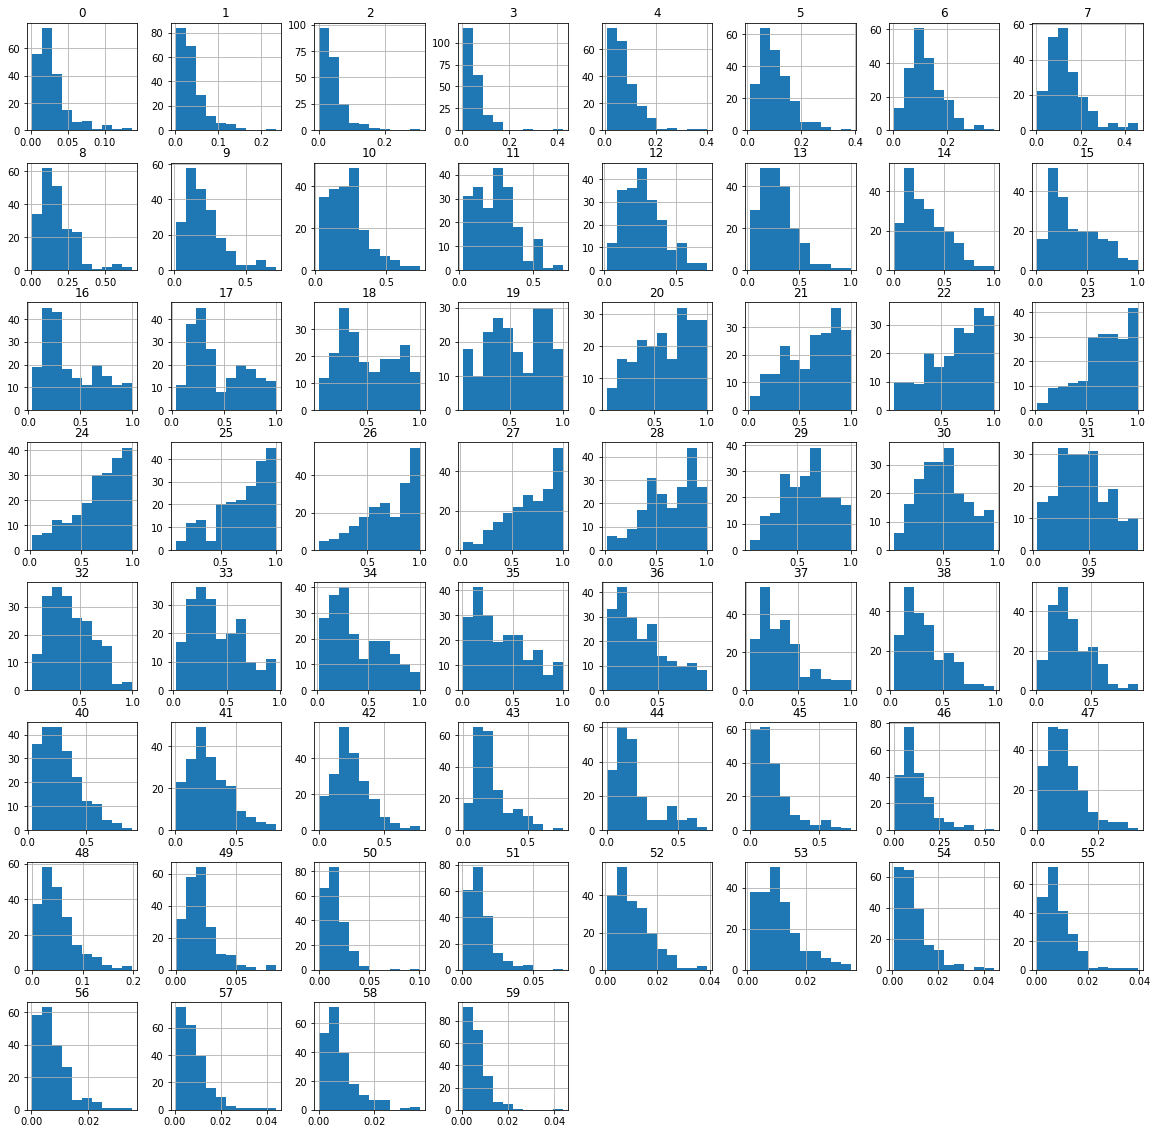

In [9]:
dataset.hist(figsize = (20,20))
plt.show()

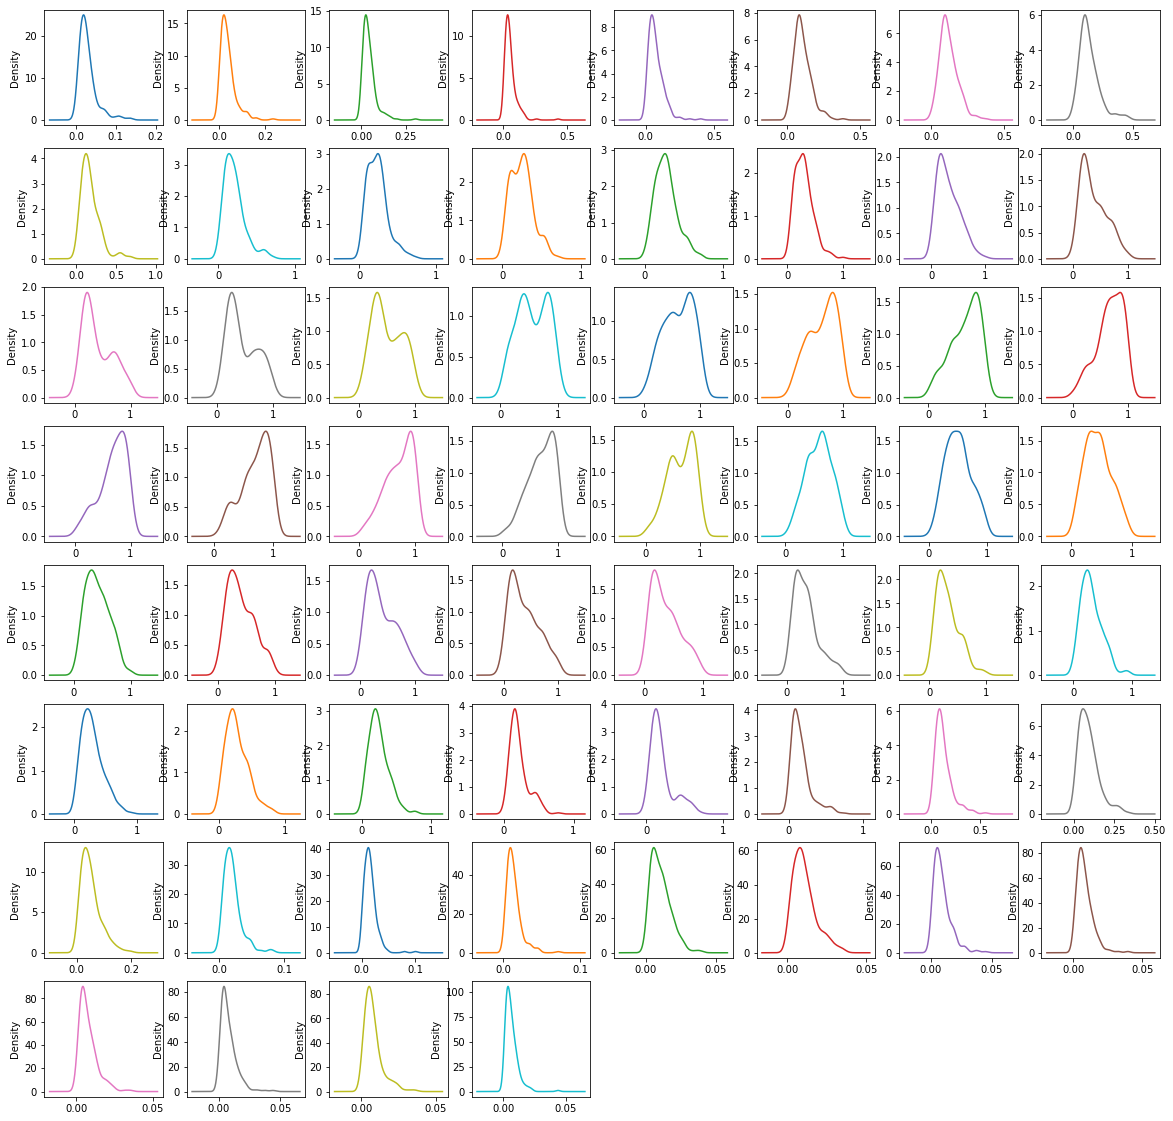

In [10]:
dataset.plot(kind = 'density', subplots = True, layout = (8,8), figsize = (20,20), sharex = False, legend = False)
plt.show()

In [11]:
corr_matrix = dataset.corr()
print (corr_matrix)

          0         1         2         3         4         5         6   \
0   1.000000  0.735896  0.571537  0.491438  0.344797  0.238921  0.260815   
1   0.735896  1.000000  0.779916  0.606684  0.419669  0.332329  0.279040   
2   0.571537  0.779916  1.000000  0.781786  0.546141  0.346275  0.190434   
3   0.491438  0.606684  0.781786  1.000000  0.726943  0.352805  0.246440   
4   0.344797  0.419669  0.546141  0.726943  1.000000  0.597053  0.335422   
5   0.238921  0.332329  0.346275  0.352805  0.597053  1.000000  0.702889   
6   0.260815  0.279040  0.190434  0.246440  0.335422  0.702889  1.000000   
7   0.355523  0.334615  0.237884  0.246742  0.204006  0.471683  0.675774   
8   0.353420  0.316733  0.252691  0.247078  0.177906  0.327578  0.470580   
9   0.318276  0.270782  0.219637  0.237769  0.183219  0.288621  0.425448   
10  0.344058  0.297065  0.274610  0.271881  0.231684  0.333570  0.396588   
11  0.210861  0.194102  0.214807  0.175381  0.211657  0.344451  0.274432   
12  0.210722

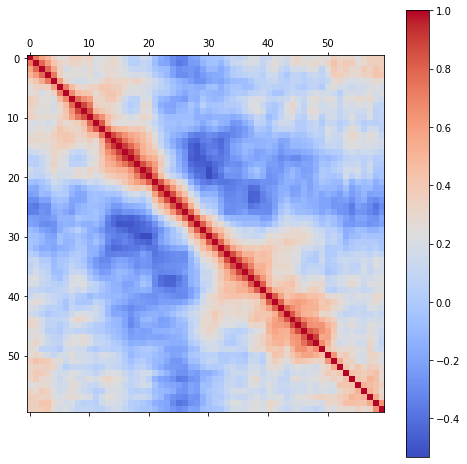

In [12]:
plt.figure(figsize = (8,8))
plt.matshow(corr_matrix, cmap = 'coolwarm', fignum = 1)
plt.colorbar()
plt.show()

In [13]:
dataset_arr = dataset.values
X = dataset_arr[:, 0:-1]
y = dataset_arr[:, -1]

In [14]:
print (X.shape)
print (y.shape)

(208, 60)
(208,)


In [15]:
print (X[:10])
print (y[:10])

[[0.02 0.0371 0.0428 0.0207 0.0954 0.0986 0.1539 0.1601 0.3109 0.2111
  0.1609 0.1582 0.2238 0.0645 0.066 0.2273 0.31 0.2999 0.5078 0.4797
  0.5783 0.5071 0.4328 0.555 0.6711 0.6415 0.7104 0.808 0.6791 0.3857
  0.1307 0.2604 0.5121 0.7547 0.8537 0.8507 0.6692 0.6097 0.4943 0.2744
  0.051 0.2834 0.2825 0.4256 0.2641 0.1386 0.1051 0.1343 0.0383 0.0324
  0.0232 0.0027 0.0065 0.0159 0.0072 0.0167 0.018 0.0084 0.009 0.0032]
 [0.0453 0.0523 0.0843 0.0689 0.1183 0.2583 0.2156 0.3481 0.3337 0.2872
  0.4918 0.6552 0.6919 0.7797 0.7464 0.9444 1.0 0.8874 0.8024 0.7818
  0.5212 0.4052 0.3957 0.3914 0.325 0.32 0.3271 0.2767 0.4423 0.2028
  0.3788 0.2947 0.1984 0.2341 0.1306 0.4182 0.3835 0.1057 0.184 0.197
  0.1674 0.0583 0.1401 0.1628 0.0621 0.0203 0.053 0.0742 0.0409 0.0061
  0.0125 0.0084 0.0089 0.0048 0.0094 0.0191 0.014 0.0049 0.0052 0.0044]
 [0.0262 0.0582 0.1099 0.1083 0.0974 0.228 0.2431 0.3771 0.5598 0.6194
  0.6333 0.706 0.5544 0.532 0.6479 0.6931 0.6759 0.7551 0.8929 0.8619
  0.7974 0.67

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

In [17]:
print (X_test.shape)

(42, 60)


In [18]:
print (X_train.shape)

(166, 60)


In [19]:
print (y_test.shape)

(42,)


In [20]:
print (y_train.shape)

(166,)


In [21]:
models = []
models.append(("logistic_regression", LogisticRegression()))
models.append(("knn", KNeighborsClassifier()))
models.append(("svm", SVC()))
models.append(("random_forest", RandomForestClassifier()))
models.append(("mlp", MLPClassifier(max_iter = 1000)))

In [22]:
print (models)

[('logistic_regression', LogisticRegression()), ('knn', KNeighborsClassifier()), ('svm', SVC()), ('random_forest', RandomForestClassifier()), ('mlp', MLPClassifier(max_iter=1000))]


In [23]:
model_results = []
for name, model in models:
    grid_search_cv = GridSearchCV(model, param_grid= {}, cv=5, scoring='accuracy')
    grid_search_cv.fit(X_train, y_train)
    model_results.append((name, grid_search_cv.best_score_))
print (model_results)

[('logistic_regression', 0.7834224598930482), ('knn', 0.7716577540106953), ('svm', 0.7894830659536541), ('random_forest', 0.8073083778966132), ('mlp', 0.8133689839572193)]


In [24]:
# testing a standardization
models_scaled = []
models_scaled.append(("logistic_regression_scaled", Pipeline([("standardScaler", StandardScaler()),("logisticRegression", LogisticRegression())])))
models_scaled.append(("knn_scaled", Pipeline([("standardScaler", StandardScaler()),("knn", KNeighborsClassifier())])))
models_scaled.append(("svm_scaled", Pipeline([("standardScaler", StandardScaler()),("svm", SVC())])))
models_scaled.append(("random_forest_scaled", Pipeline([("standardScaler", StandardScaler()),("random_forest", RandomForestClassifier())])))
models_scaled.append(("mlp_scaled", Pipeline([("standardScaler", StandardScaler()),("random_forest", MLPClassifier(max_iter = 1000))])))

In [25]:
model_scaled_results = []
for name, model in models_scaled:
    grid_search_cv_scaled = GridSearchCV(model, param_grid= {}, cv=5, scoring='accuracy')
    grid_search_cv_scaled.fit(X_train, y_train)
    model_scaled_results.append([name, grid_search_cv_scaled.best_score_])
print (model_scaled_results)

[['logistic_regression_scaled', 0.8014260249554367], ['knn_scaled', 0.8140819964349376], ['svm_scaled', 0.8798573975044564], ['random_forest_scaled', 0.8254901960784314], ['mlp_scaled', 0.8559714795008914]]


In [26]:
# Tuning hyperparameters for the best performing models (svm)
pipeline = Pipeline([('scaler', StandardScaler()),('svm', SVC())])
param_grid = {
    'svm__kernel': ['linear', 'rbf', 'poly', 'sigmoid', 'precomputed'],
    'svm__gamma': [0.01, 0.1, 1, 10, 100, 'scale','auto'],
    'svm__C': [0.01, 0.1, 1, 10, 100]
}
gs_cv = GridSearchCV(pipeline, param_grid=param_grid, cv=5, scoring ='accuracy')
gs_cv.fit(X_train, y_train)
print ("the best score is: ",gs_cv.best_score_,', the best parameter set is: ',gs_cv.best_params_)

the best score is:  0.8798573975044564 , the best parameter set is:  {'svm__C': 1, 'svm__gamma': 'scale', 'svm__kernel': 'rbf'}


C:\Users\HASSAN\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
175 fits failed out of a total of 875.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
35 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\HASSAN\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\HASSAN\anaconda3\lib\site-packages\sklearn\pipeline.py", line 405, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\Users\HASSAN\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 217, in fit
    raise ValueError(
ValueError: Precomputed matrix must be a

In [27]:
# Tuning hyperparameters for the best performing models (mlpc)
pipeline_mlpc = Pipeline([('scaler', StandardScaler()),('mlpc', MLPClassifier())])
param_grid = {
    'mlpc__hidden_layer_sizes': [(50,),(100,),(50,50),(100,100)],
    'mlpc__activation': ['identity', 'logistic', 'tanh', 'relu'],
    'mlpc__alpha': [0.0001, 0.001, 0.01],
    'mlpc__solver': ['lbfgs', 'sgd', 'adam'],
    'mlpc__learning_rate': ['constant', 'invscaling', 'adaptive'],
    'mlpc__max_iter': [1200]
}
gs_cv_mlpc = GridSearchCV(pipeline_mlpc, param_grid=param_grid, cv=5, scoring ='accuracy')
gs_cv_mlpc.fit(X_train, y_train)
print ("the best score is: ",gs_cv_mlpc.best_score_,', the best parameter set is: ',gs_cv_mlpc.best_params_)

C:\Users\HASSAN\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\HASSAN\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\HASSAN\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\HASSAN\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\HASSAN\anaconda3\lib\site-packages\sklearn\neural_netwo

C:\Users\HASSAN\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\HASSAN\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\HASSAN\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\HASSAN\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\HASSAN\anaconda3\lib\site-packages\sklearn\neural_netwo

C:\Users\HASSAN\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\HASSAN\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\HASSAN\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\HASSAN\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\HASSAN\anaconda3\lib\site-packages\sklearn\neural_netwo

C:\Users\HASSAN\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\HASSAN\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\HASSAN\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\HASSAN\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\HASSAN\anaconda3\lib\site-packages\sklearn\neural_netwo

C:\Users\HASSAN\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\HASSAN\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\HASSAN\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\HASSAN\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\HASSAN\anaconda3\lib\site-packages\sklearn\neural_netwo

C:\Users\HASSAN\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\HASSAN\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\HASSAN\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\HASSAN\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\HASSAN\anaconda3\lib\site-packages\sklearn\neural_netwo

the best score is:  0.8919786096256684 , the best parameter set is:  {'mlpc__activation': 'relu', 'mlpc__alpha': 0.0001, 'mlpc__hidden_layer_sizes': (100, 100), 'mlpc__learning_rate': 'constant', 'mlpc__max_iter': 1200, 'mlpc__solver': 'adam'}


In [28]:
best_mlpc_model = gs_cv_mlpc.best_estimator_
best_svm_model = gs_cv.best_estimator_

In [48]:
gscv_mlpc2 = GridSearchCV(best_mlpc_model, param_grid = {'mlpc__random_state':[1]}, cv=5, scoring = 'accuracy')
gscv_mlpc2.fit(X_train, y_train)
print (gscv_mlpc2.best_score_)

0.8436720142602496


In [49]:
gscv_svm = GridSearchCV(best_svm_model, param_grid = {'svm__random_state':[1]}, cv=5, scoring = 'accuracy')
gscv_svm.fit(X_train, y_train)
print (gscv_svm.best_score_)

0.8798573975044564


In [58]:
gs_cv_mlpc.cv_results_['std_test_score'].mean()

0.05569586268639076

In [66]:
std_test_score = gs_cv.cv_results_['std_test_score']
mask = ~np.isnan(std_test_score)
print (std_test_score[mask].mean())

0.045175891330050434


In [75]:
best_mlpc_model.fit(X_train, y_train)
best_mlpc_model.score(X_test, y_test)

0.8571428571428571

In [76]:
best_svm_model.fit(X_train, y_train)
best_svm_model.score(X_test, y_test)

0.7380952380952381

In [71]:
best_svm_model

Pipeline(steps=[('scaler', StandardScaler()), ('svm', SVC(C=1))])

In [77]:
best_mlpc_model

Pipeline(steps=[('scaler', StandardScaler()),
                ('mlpc',
                 MLPClassifier(hidden_layer_sizes=(100, 100), max_iter=1200))])

[[19  1]
 [ 5 17]]


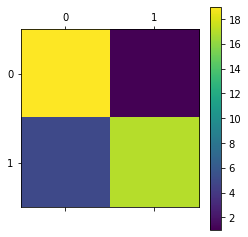

In [89]:
y_pred = best_mlpc_model.predict(X_test)
print (confusion_matrix(y_test, y_pred))
plt.matshow(confusion_matrix(y_test, y_pred))
plt.colorbar()
plt.show()

In [84]:
print (classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           M       0.79      0.95      0.86        20
           R       0.94      0.77      0.85        22

    accuracy                           0.86        42
   macro avg       0.87      0.86      0.86        42
weighted avg       0.87      0.86      0.86        42



In [90]:
print (y_test)
print (y_pred)

['M' 'M' 'M' 'M' 'R' 'R' 'M' 'R' 'M' 'R' 'R' 'R' 'M' 'M' 'M' 'M' 'R' 'M'
 'R' 'R' 'M' 'R' 'R' 'R' 'M' 'M' 'R' 'R' 'R' 'M' 'M' 'M' 'R' 'R' 'R' 'R'
 'R' 'R' 'R' 'M' 'M' 'M']
['M' 'R' 'M' 'M' 'R' 'R' 'M' 'R' 'M' 'R' 'M' 'R' 'M' 'M' 'M' 'M' 'R' 'M'
 'M' 'R' 'M' 'R' 'R' 'R' 'M' 'M' 'M' 'M' 'R' 'M' 'M' 'M' 'R' 'M' 'R' 'R'
 'R' 'R' 'R' 'M' 'M' 'M']


<h2>*** our neural network model (Multi Layer Perceptron) looks good to go, with an accuracy of ~86% and a mean precisoin of 87% and a mean recall of 86% and f1-score of 86% ***</h2> 